## 1. Import libraries

In [21]:
# !pip install numpy pandas matplotlib scikit-learn tensorflow imbalanced-learn

import os
import zipfile
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Extract archive.zip

In [3]:
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("heart_disease_data")

## 3. Load the dataset

In [4]:
df = pd.read_csv("heart_disease_data/heart.csv")
print("✅ Data Loaded Successfully")
print(df.head())

✅ Data Loaded Successfully
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 4. Check and handle missing values

In [5]:
print("\n🔎 Checking for null values:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("Null values removed (if any existed)")


🔎 Checking for null values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Null values removed (if any existed)


## 5. Detect outliers using box plots

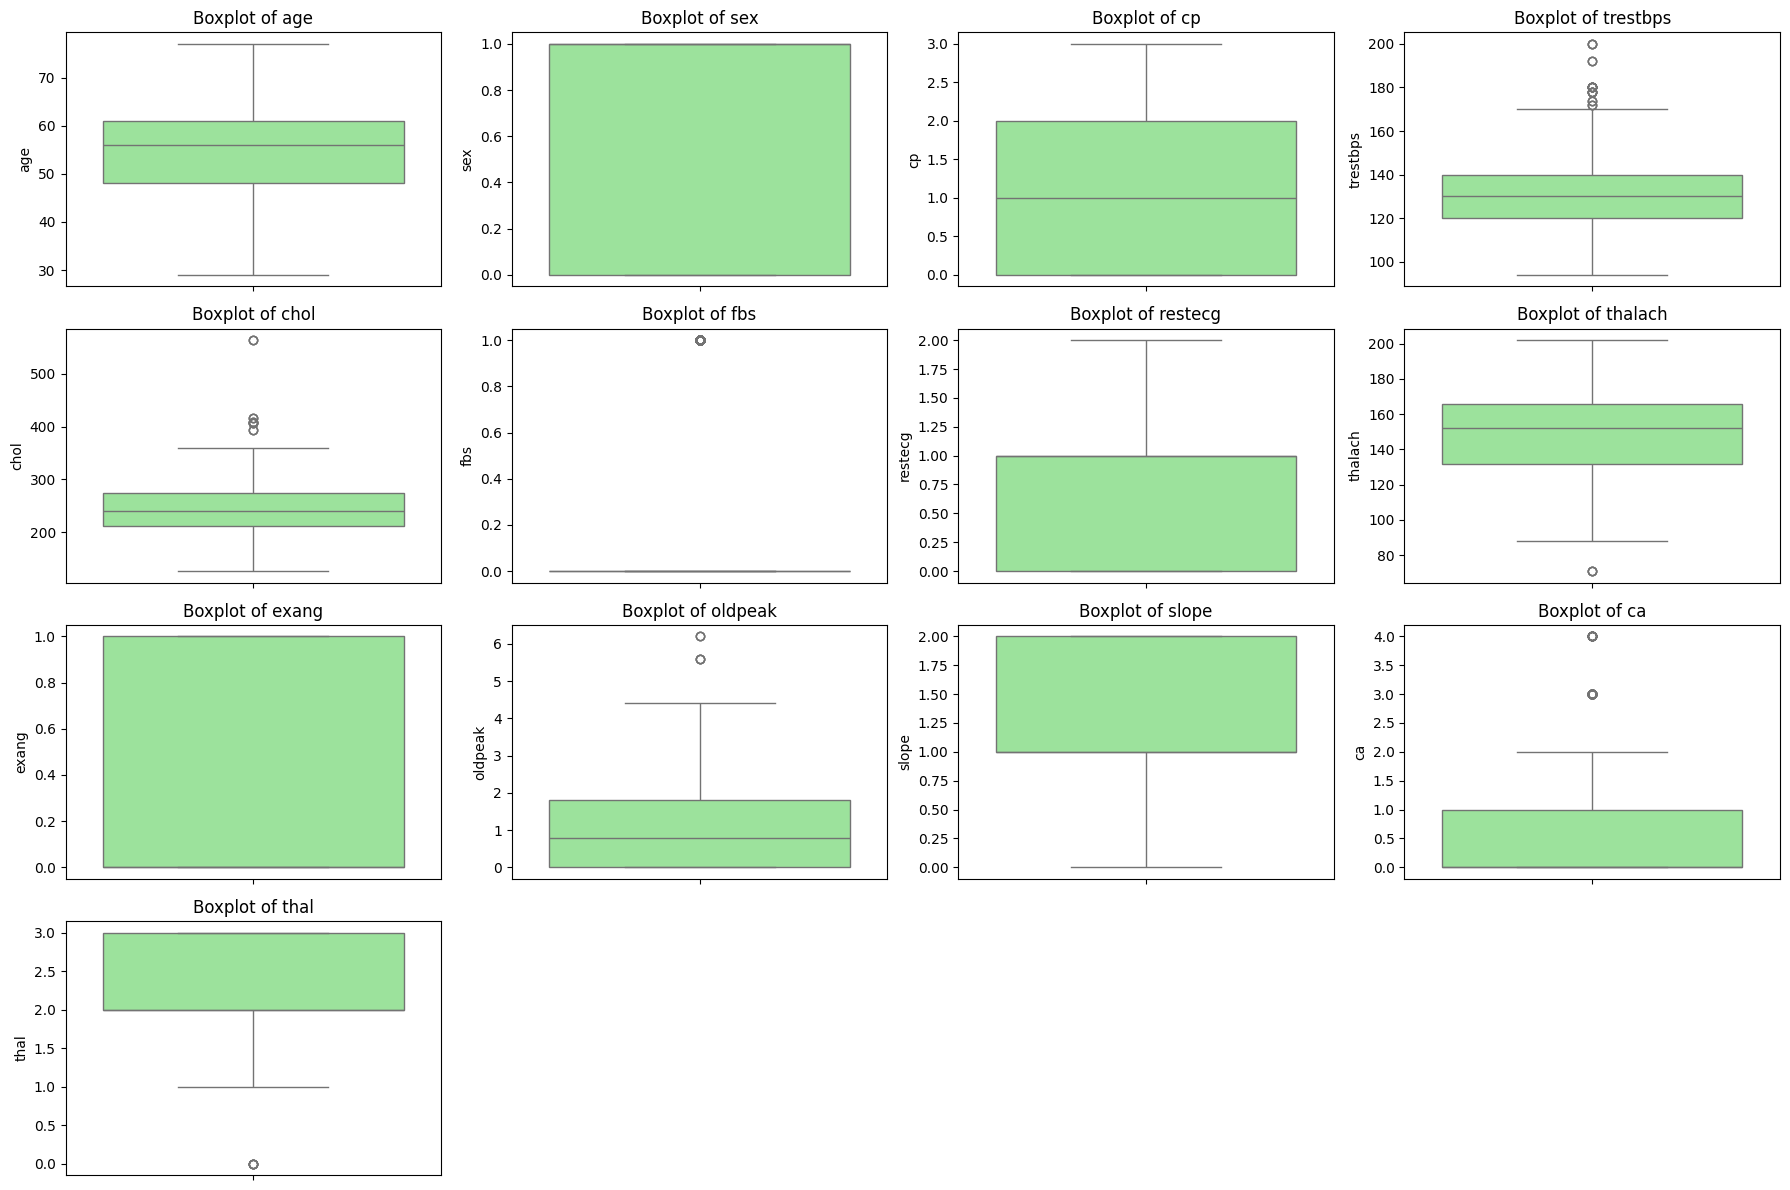

In [6]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(df.drop('target', axis=1).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## 6. Correlation Heatmap

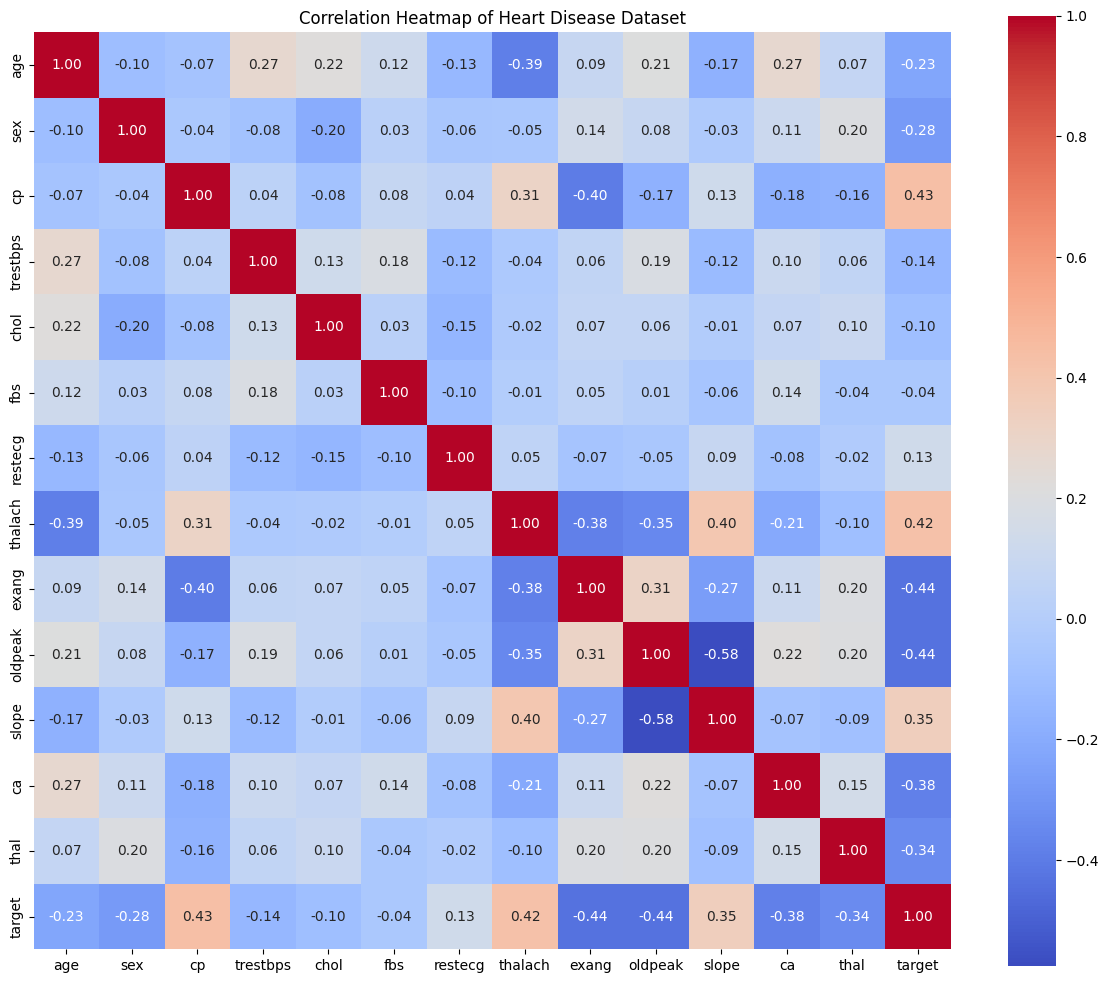

In [7]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.tight_layout()
plt.show()

## 7. Data Preprocessing

In [22]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

os.makedirs("model", exist_ok=True)
joblib.dump(scaler, 'model/scaler.pkl')
print("💾 Scaler saved as model/scaler.pkl")

💾 Scaler saved as model/scaler.pkl


## 8. Apply SMOTE

In [9]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
print(f"\n SMOTE applied: New class distribution:\n{pd.Series(y_resampled).value_counts()}")


 SMOTE applied: New class distribution:
target
0    526
1    526
Name: count, dtype: int64


## 9. Train & Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

## 10. Build the Model

In [11]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

## 11. Train the Model

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9609 - loss: 0.1389 - val_accuracy: 0.8720 - val_loss: 0.3507
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1676 - val_accuracy: 0.8720 - val_loss: 0.3515
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.1752 - val_accuracy: 0.8720 - val_loss: 0.3502
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.1387 - val_accuracy: 0.8720 - val_loss: 0.3450
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1241 - val_accuracy: 0.8720 - val_loss: 0.3429
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1144 - val_accuracy: 0.8720 - val_loss: 0.3414
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1177 - val_accuracy: 0.8780 - val_loss: 0.3360
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.1414 - val_accuracy: 0.8780 - val_loss:

## 12.  Plot Accuracy

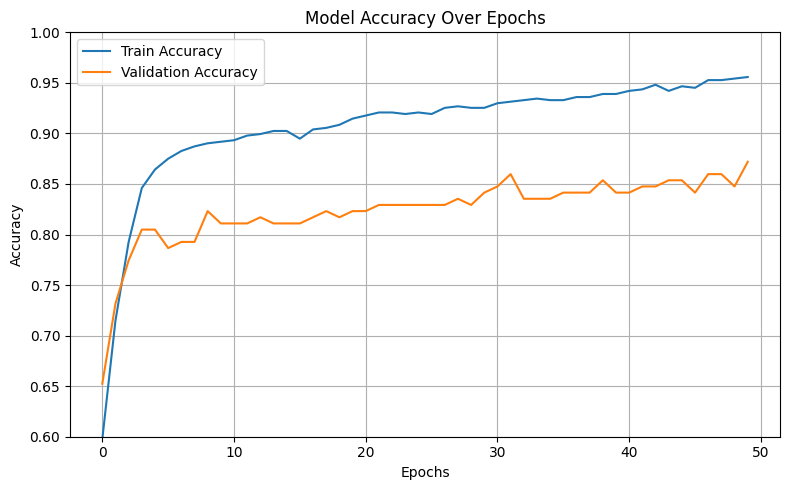

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()


## 13. Evaluate on Test Set

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("\n Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\n Classification Report:\n", classification_report(y_test, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

 Test Accuracy: 0.9219512195121952

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.95      0.89      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



## 14. Save Model

In [20]:
model.save("heart_disease_model.h5")
print("💾 Model saved as heart_disease_model.h5")

💾 Model saved as heart_disease_model.h5


## 15. Predict from Manual Input

In [23]:
def predict_manual():
    print("\n🔍 Enter patient details to predict heart disease:")
    input_data = []

    feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol',
                     'fbs', 'restecg', 'thalach', 'exang',
                     'oldpeak', 'slope', 'ca', 'thal']

    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                input_data.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    prediction = model.predict(input_scaled)
    result = "💔 High risk of heart disease" if prediction[0][0] > 0.5 else "❤️ Low risk of heart disease"

    print(f"\nPrediction: {result} (Confidence: {prediction[0][0]:.2f})")

predict_manual()


🔍 Enter patient details to predict heart disease:
Enter age: 34
Enter sex: 0
Enter cp: 1
Enter trestbps: 118
Enter chol: 210
Enter fbs: 0
Enter restecg: 1
Enter thalach: 192
Enter exang: 0
Enter oldpeak: 0.7
Enter slope: 2
Enter ca: 0
Enter thal: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

Prediction: 💔 High risk of heart disease (Confidence: 1.00)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
